#### Imports and path

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
input_path = r'C:\Users\caios\OneDrive\Documentos\Study\repo-github\tv_shows_analysis\data_files'

#### Loading the data

In [3]:
# Credits files
disney_credits = pd.read_csv(f'{input_path}/disney_plus/credits.csv')
hbo_credits = pd.read_csv(f'{input_path}/hbo_max/credits.csv')
netflix_credits = pd.read_csv(f'{input_path}/netflix/credits.csv')
prime_credits = pd.read_csv(f'{input_path}/prime_video/credits.csv')


In [4]:
# Titles files
disney_titles = pd.read_csv(f'{input_path}/disney_plus/titles.csv')
hbo_titles = pd.read_csv(f'{input_path}/hbo_max/titles.csv')
netflix_titles = pd.read_csv(f'{input_path}/netflix/titles.csv')
prime_titles = pd.read_csv(f'{input_path}/prime_video/titles.csv')

In [5]:
def replacing_strings(df):
    """This function it suits to treat some strings erros"""
    df = df.replace('\t', '', regex=True)
    df = df.replace('\;', ' ', regex=True)
    df = df.replace('\n;', ' ', regex=True)
    df = df.replace('\n;', ' ', regex=True)
    df = df.replace('\\n', ' ', regex=True)
    df = df.replace('\s', ' ', regex=True)

    return df

In [6]:
list_credits = [hbo_credits, netflix_credits, prime_credits]
final_credits = pd.DataFrame(disney_credits)


for i in range(len(list_credits)):
    final_credits = pd.concat([final_credits, list_credits[i]], ignore_index=True)

final_credits = replacing_strings(final_credits)

In [7]:
list_titles = [hbo_titles, netflix_titles, prime_titles]
final_titles = pd.DataFrame(disney_titles)


for i in range(len(list_titles)):
    final_titles = pd.concat([final_titles, list_titles[i]], ignore_index=True)

final_titles = replacing_strings(final_titles)

#### EDA

##### Basic information

In [8]:
final_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294253 entries, 0 to 294252
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  294253 non-null  int64 
 1   id         294253 non-null  object
 2   name       294253 non-null  object
 3   character  262191 non-null  object
 4   role       294253 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.2+ MB


In [9]:
final_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20506 entries, 0 to 20505
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    20506 non-null  object 
 1   title                 20505 non-null  object 
 2   type                  20506 non-null  object 
 3   description           20351 non-null  object 
 4   release_year          20506 non-null  int64  
 5   age_certification     9876 non-null   object 
 6   runtime               20506 non-null  int64  
 7   genres                20506 non-null  object 
 8   production_countries  20506 non-null  object 
 9   seasons               4575 non-null   float64
 10  imdb_id               18667 non-null  object 
 11  imdb_score            18163 non-null  float64
 12  imdb_votes            18123 non-null  float64
 13  tmdb_popularity       19821 non-null  float64
 14  tmdb_score            17729 non-null  float64
dtypes: float64(5), int6

In [10]:
# Changing the float format from output
final_credits['person_id'].describe().apply("{0:.5f}".format)

count     294253.00000
mean      410196.01958
std       574034.32148
min            1.00000
25%        27791.00000
50%       110447.00000
75%       601235.00000
max      2371585.00000
Name: person_id, dtype: object

In [11]:
final_titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,20506.000000,20506.000000,4575.000000,18163.000000,1.812300e+04,19821.000000,17729.000000
mean,2005.632547,80.870282,2.526776,6.322783,2.599976e+04,16.308313,6.465102
std,22.426010,37.231306,3.369027,1.284135,1.043554e+05,92.292064,1.379300
min,1901.000000,0.000000,1.000000,1.100000,5.000000e+00,0.000011,0.500000
25%,2004.000000,54.000000,1.000000,5.500000,2.150000e+02,1.839000,5.700000
50%,2016.000000,87.000000,1.000000,6.400000,1.201000e+03,4.483000,6.600000
75%,2019.000000,103.000000,3.000000,7.300000,7.750000e+03,11.622000,7.300000
max,2022.000000,549.000000,52.000000,9.900000,2.555504e+06,9323.832000,10.000000


In [12]:
final_titles['imdb_votes'].describe().apply("{0:.5f}".format)

count      18123.00000
mean       25999.76008
std       104355.35592
min            5.00000
25%          215.00000
50%         1201.00000
75%         7750.00000
max      2555504.00000
Name: imdb_votes, dtype: object

In [13]:
final_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [14]:
final_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

##### Duplicated Values

In [15]:
final_credits.duplicated().sum()

3860

In [16]:
final_titles.duplicated().sum()

227

##### Unique Values

In [17]:
final_credits.nunique()

person_id    154504
id            18638
name         152291
character    158860
role              2
dtype: int64

In [18]:
final_credits['role'].unique()

array(['ACTOR', 'DIRECTOR'], dtype=object)

In [19]:
final_titles.nunique()

id                      20276
title                   19763
type                        2
description             20099
release_year              116
age_certification          11
runtime                   230
genres                   3928
production_countries      949
seasons                    38
imdb_id                 18450
imdb_score                 87
imdb_votes               8433
tmdb_popularity         11402
tmdb_score                 90
dtype: int64

In [20]:
final_titles['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [21]:
final_titles['age_certification'].unique()

array(['G', 'PG', nan, 'TV-G', 'TV-PG', 'TV-14', 'PG-13', 'TV-Y7', 'TV-Y',
       'TV-MA', 'R', 'NC-17'], dtype=object)

In [22]:
final_titles['seasons'].unique()

array([nan,  5.,  7.,  3.,  1., 34., 32.,  4.,  6.,  2.,  8.,  9., 11.,
       20., 18., 10., 16., 52., 25., 15., 12., 28., 14., 31., 26., 13.,
       17., 24., 39., 42., 21., 37., 29., 19., 49., 51., 22., 35., 33.])

##### Visualize unique counts

<AxesSubplot:xlabel='role', ylabel='count'>

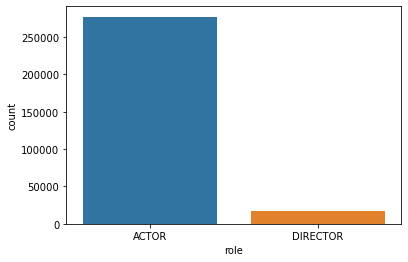

In [23]:
sns.countplot(x='role', data=final_credits)

<AxesSubplot:xlabel='type', ylabel='count'>

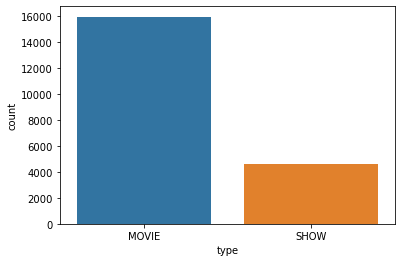

In [24]:
sns.countplot(x='type', data=final_titles)

<AxesSubplot:xlabel='count', ylabel='age_certification'>

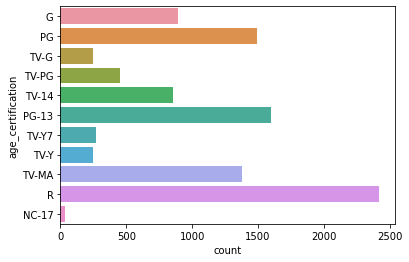

In [25]:
sns.countplot(y='age_certification', data=final_titles)

#### Find the null values

In [26]:
final_credits.isnull().sum()

person_id        0
id               0
name             0
character    32062
role             0
dtype: int64

In [27]:
final_credits[final_credits['character'].isna()]

,person_id,id,name,character,role
4,23441,tm74391,Paul Satterfield,NaN,DIRECTOR
5,23442,tm74391,Hamilton Luske,NaN,DIRECTOR
6,23443,tm74391,Jim Handley,NaN,DIRECTOR
7,6164,tm74391,Ford Beebe,NaN,DIRECTOR
8,23444,tm74391,T. Hee,NaN,DIRECTOR
...,...,...,...,...,...
294244,241498,tm847725,Super Subbarayan,NaN,ACTOR
294245,1288659,tm847725,Mathialagan Muniandy,NaN,ACTOR
294246,172842,tm847725,Sona Heiden,NaN,ACTOR
294247,1288705,tm847725,K. Veerakumar,NaN,DIRECTOR


In [72]:
final_titles.isnull().sum()

id                          0
title                       1
type                        0
description               155
release_year                0
age_certification       10630
runtime                     0
genres                      0
production_countries        0
seasons                 15931
imdb_id                  1839
imdb_score               2343
imdb_votes               2383
tmdb_popularity           685
tmdb_score               2777
dtype: int64

In [28]:
final_titles[final_titles['title'].isna()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
6634,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN


In [30]:
final_titles[final_titles['imdb_score'].isna()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
11,tm3616,Steamboat Willie,MOVIE,"Mickey Mouse, piloting a steamboat, delights h...",1928,G,8,['animation'],['US'],NaN,NaN,NaN,NaN,10.513,7.4
13,tm71205,How to Play Baseball,MOVIE,Goofy shows us the national pastime. After a b...,1942,NaN,8,"['comedy', 'animation']",['US'],NaN,NaN,NaN,NaN,4.179,6.6
15,tm8579,Ferdinand the Bull,MOVIE,This Oscar-winning short tells of a bull who p...,1938,G,8,['comedy'],['US'],NaN,NaN,NaN,NaN,10.983,6.5
16,tm134279,Three Little Pigs,MOVIE,The two pigs building houses of hay and sticks...,1933,NaN,8,['comedy'],['US'],NaN,NaN,NaN,NaN,8.883,6.8
17,tm74410,Tugboat Mickey,MOVIE,Mickey is performing routine maintenance on hi...,1940,NaN,7,"['animation', 'family', 'comedy']",['US'],NaN,NaN,NaN,NaN,5.845,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20496,tm1142918,Ty Barnett: Yep,MOVIE,"Ty Barnett, a Chicago native, got his start at...",2021,PG,25,[],[],NaN,tt11979448,NaN,NaN,0.600,5.8
20500,ts295958,GameOn Titans,SHOW,Eight mobile gamers battle it out in a series ...,2021,NaN,17,[],[],1.0,tt14747014,NaN,NaN,NaN,NaN
20502,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
20503,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
